<a href="https://colab.research.google.com/github/hajabikouf/test_notebooks/blob/main/mnist_classification_using_ANN_(OCR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets as ds
import matplotlib.pyplot as plt


print(tf.__version__)

2.4.0


In [ ]:
mnist = ds.mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist
# normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


# build the model architecture 




In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


# train the model

In [ ]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4836 - accuracy: 0.8586 - val_loss: 0.1412 - val_accuracy: 0.9577
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1475 - accuracy: 0.9544 - val_loss: 0.1024 - val_accuracy: 0.9682
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1096 - accuracy: 0.9671 - val_loss: 0.0877 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0908 - accuracy: 0.9716 - val_loss: 0.0763 - val_accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0705 - accuracy: 0.9781 - val_loss: 0.0724 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0635 - accuracy: 0.9799 - val_loss: 0.0688 - val_accuracy: 0.9802
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0553 - accuracy: 0.9822 - val_loss: 0.0706 - val_accuracy:

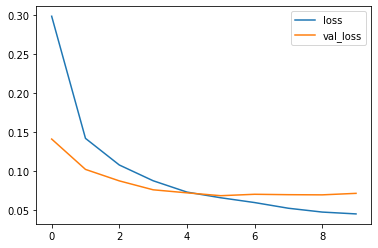

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

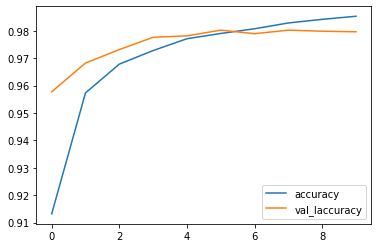

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_laccuracy')
plt.legend()

In [ ]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0718 - accuracy: 0.9796
[0.07176170498132706, 0.9796000123023987]


Confusion matrix, without normalization
[[ 974    0    1    1    0    0    1    1    2    0]
 [   1 1127    4    0    0    0    1    0    2    0]
 [   1    2 1011    1    2    0    2    7    6    0]
 [   0    0    8  984    0    5    0    6    4    3]
 [   2    0    1    0  958    0    5    1    0   15]
 [   2    0    0    6    0  869    9    1    3    2]
 [   4    3    1    1    2    3  943    0    1    0]
 [   2    3   12    1    0    0    0 1002    2    6]
 [   3    1    3    4    4    1    4    2  948    4]
 [   3    3    0    3    8    5    0    5    2  980]]


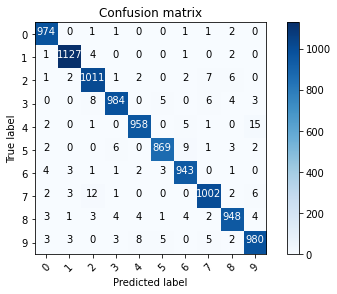

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

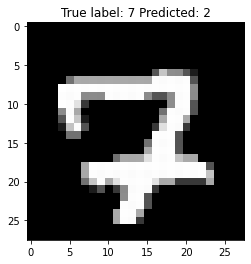

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));